In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
# Again seaborn comes with a great dataset to play and learn with
flight_dframe = sns.load_dataset('flights')

In [3]:
#Preview
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
# Let's pivot this dataframe do its easier to manage
flight_dframe = flight_dframe.pivot("month","year","passengers")

#Show
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


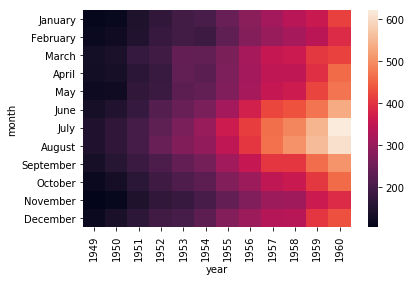

In [5]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(flight_dframe)

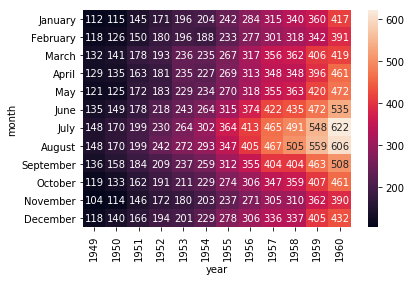

In [6]:
# We also have the option to annotate each cell
sns.heatmap(flight_dframe,annot=True,fmt='d')

In [7]:
# seaborn will automatically try to pick the best color scheme for your dataset, whether is be diverging or converging colormap

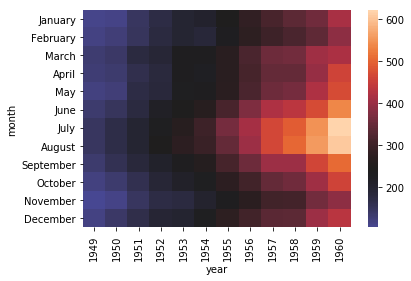

In [8]:
# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

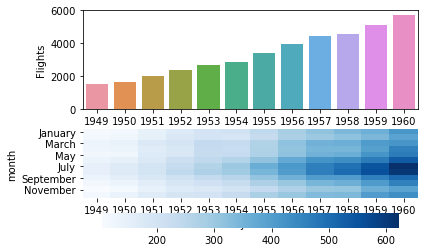

In [9]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

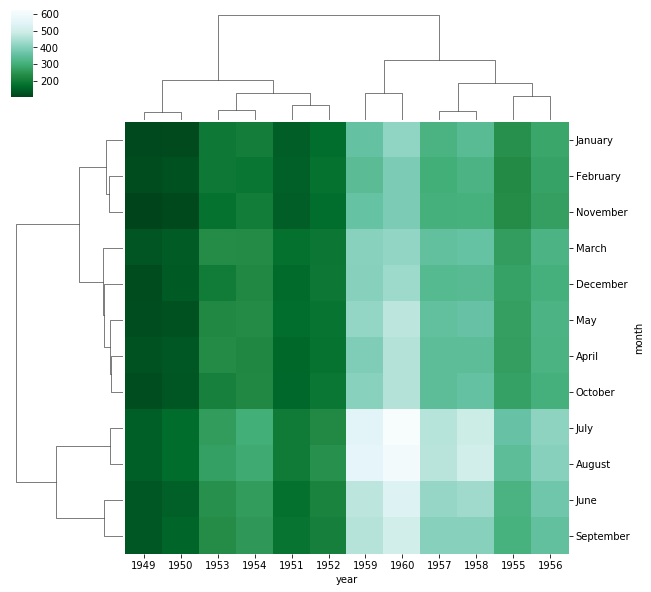

In [10]:
# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe,cmap="BuGn_r")

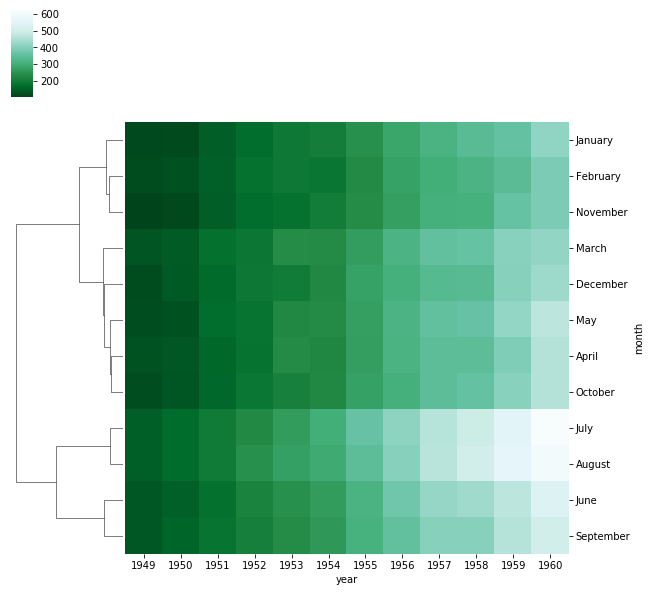

In [11]:
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False,cmap="BuGn_r")

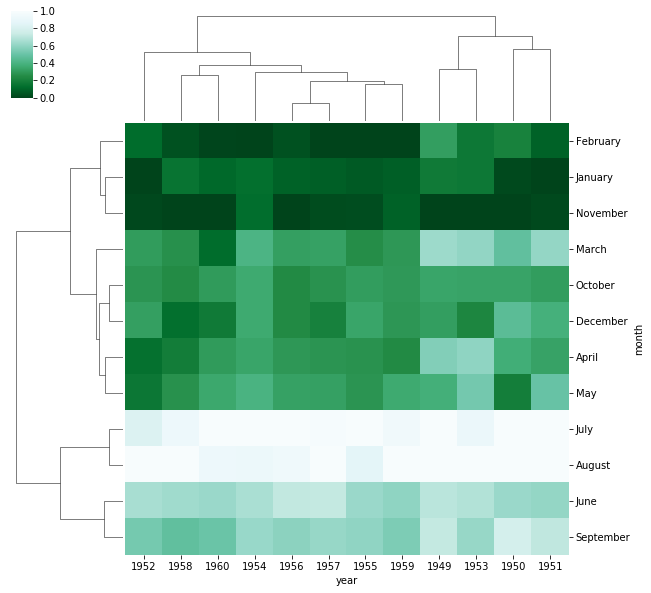

In [12]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1,cmap="BuGn_r") # standardize by columns (year)

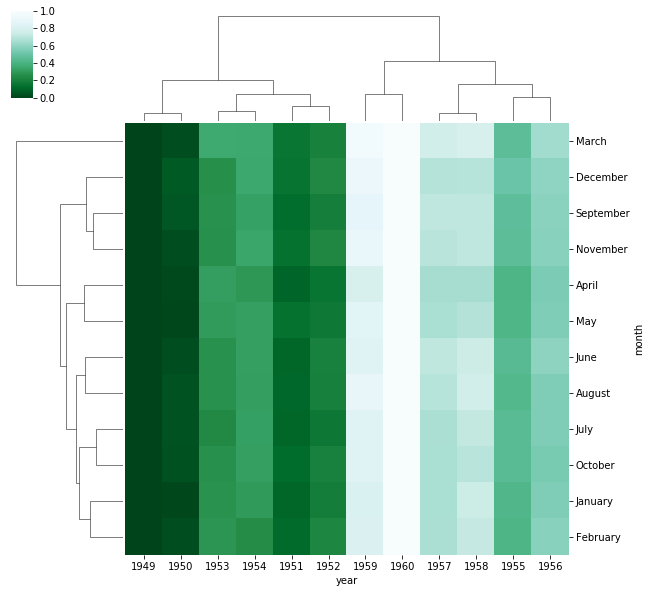

In [13]:
# Or scale the rows
sns.clustermap(flight_dframe,standard_scale=0,cmap="BuGn_r")

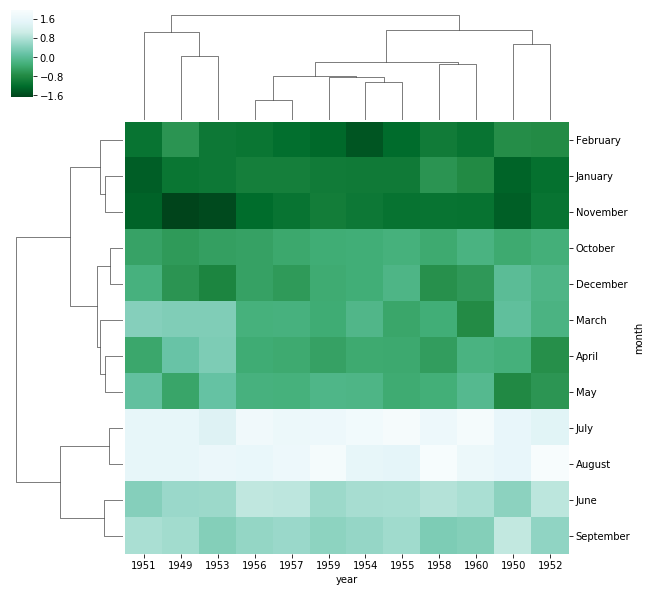

In [14]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1,cmap="BuGn_r")

Above we can see which values are greater than the mean and which are below very clearly

CONGRATULATIONS!! We've developed quite a toolbox to hammer out some great data anaysis projects!

Up next: Projects to apply what we've learned to real datasets!